This project can be a useful starting point for developing and practicing a methodology for solving image classification using convolutional neural networks.




In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

In [ ]:
classnames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# EDA

In [ ]:
print("train images shape : " , train_img.shape)
print("train labels shape :" , train_labels.shape)
print("test images shape : ", test_img.shape)
print("test labels shape :" , test_labels.shape)


train images shape :  (60000, 28, 28)
train labels shape : (60000,)
test images shape :  (10000, 28, 28)
test labels shape : (10000,)


In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Data preprocessing 

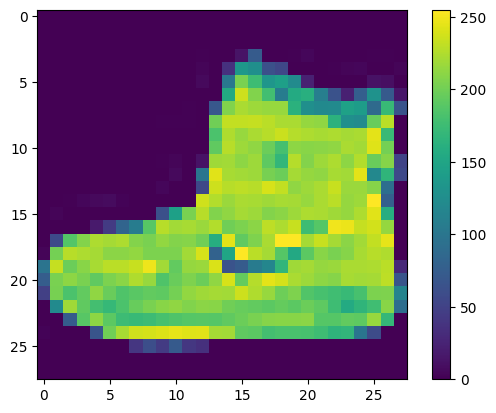

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

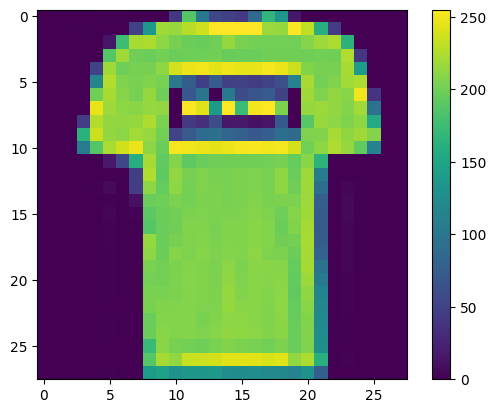

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_img = train_img / 255.0

test_img = test_img / 255.0

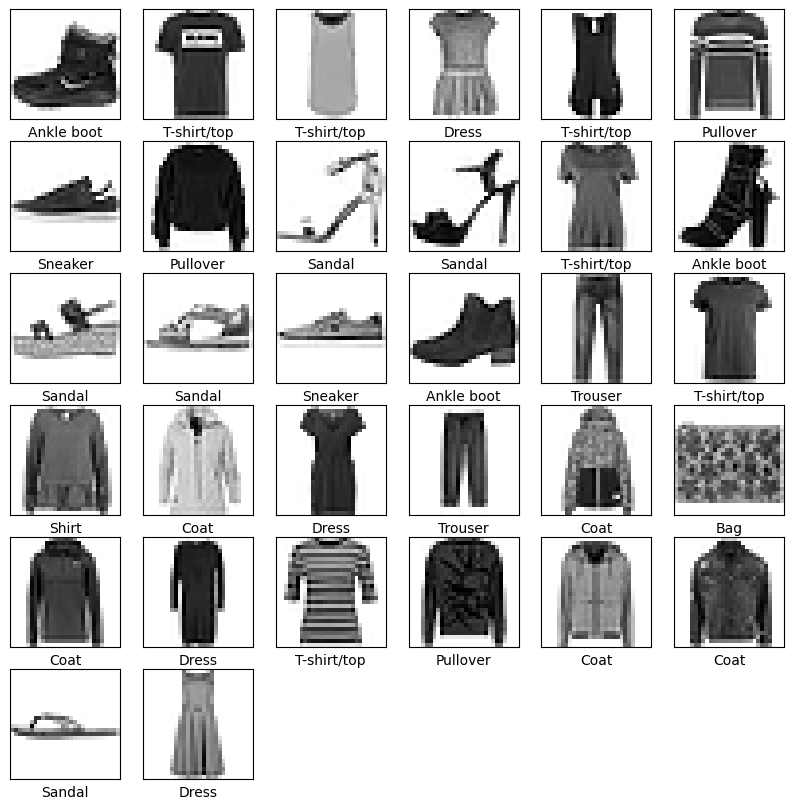

In [ ]:
plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(classnames[train_labels[i]])
plt.show()

# Building the model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

## Compiling the model : 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model 

In [ ]:
model.fit(train_img, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2313 - accuracy: 0.9128
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2235 - accuracy: 0.9163
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2155 - accuracy: 0.9182
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2105 - accuracy: 0.9211
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2028 - accuracy: 0.9239
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1991 - accuracy: 0.9255
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1939 - accuracy: 0.9271
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1869 - accuracy: 0.9301
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1839 - accuracy: 0.9307
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.179

 This model reaches an accuracy of about 0.93 (or 93%) on the training data.

# Evaluating the model 

In [ ]:
test_loss, test_acc = model.evaluate(test_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3479 - accuracy: 0.8895 - 328ms/epoch - 1ms/step

Test accuracy: 0.8895000219345093


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting

## Let's start making predictions using a Softmax layer :

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_img)

313/313 [==============================] - 0s 1ms/step


our first prediction 

In [ ]:
predictions[1]


array([1.3727515e-03, 3.0801138e-16, 9.9774182e-01, 8.9869767e-13,
       8.5944997e-04, 1.2360259e-09, 2.6012933e-05, 3.2936195e-12,
       3.2254532e-11, 2.1145302e-14], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. Let's see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[1])


2

## Some graphs 

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classnames[predicted_label],
                                100*np.max(predictions_array),
                                classnames[true_label]),
                                color=color)
  



In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

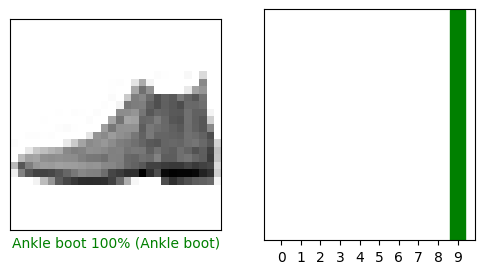

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

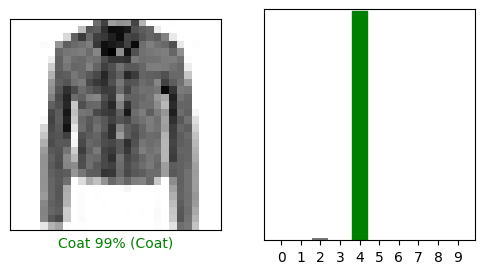

In [ ]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

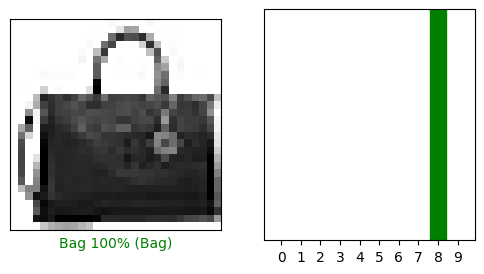

In [ ]:
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

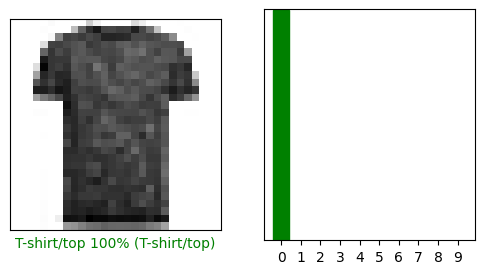

In [ ]:
i = 125
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

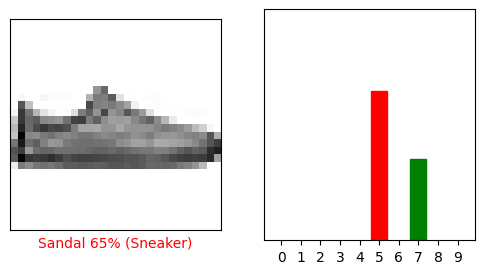

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

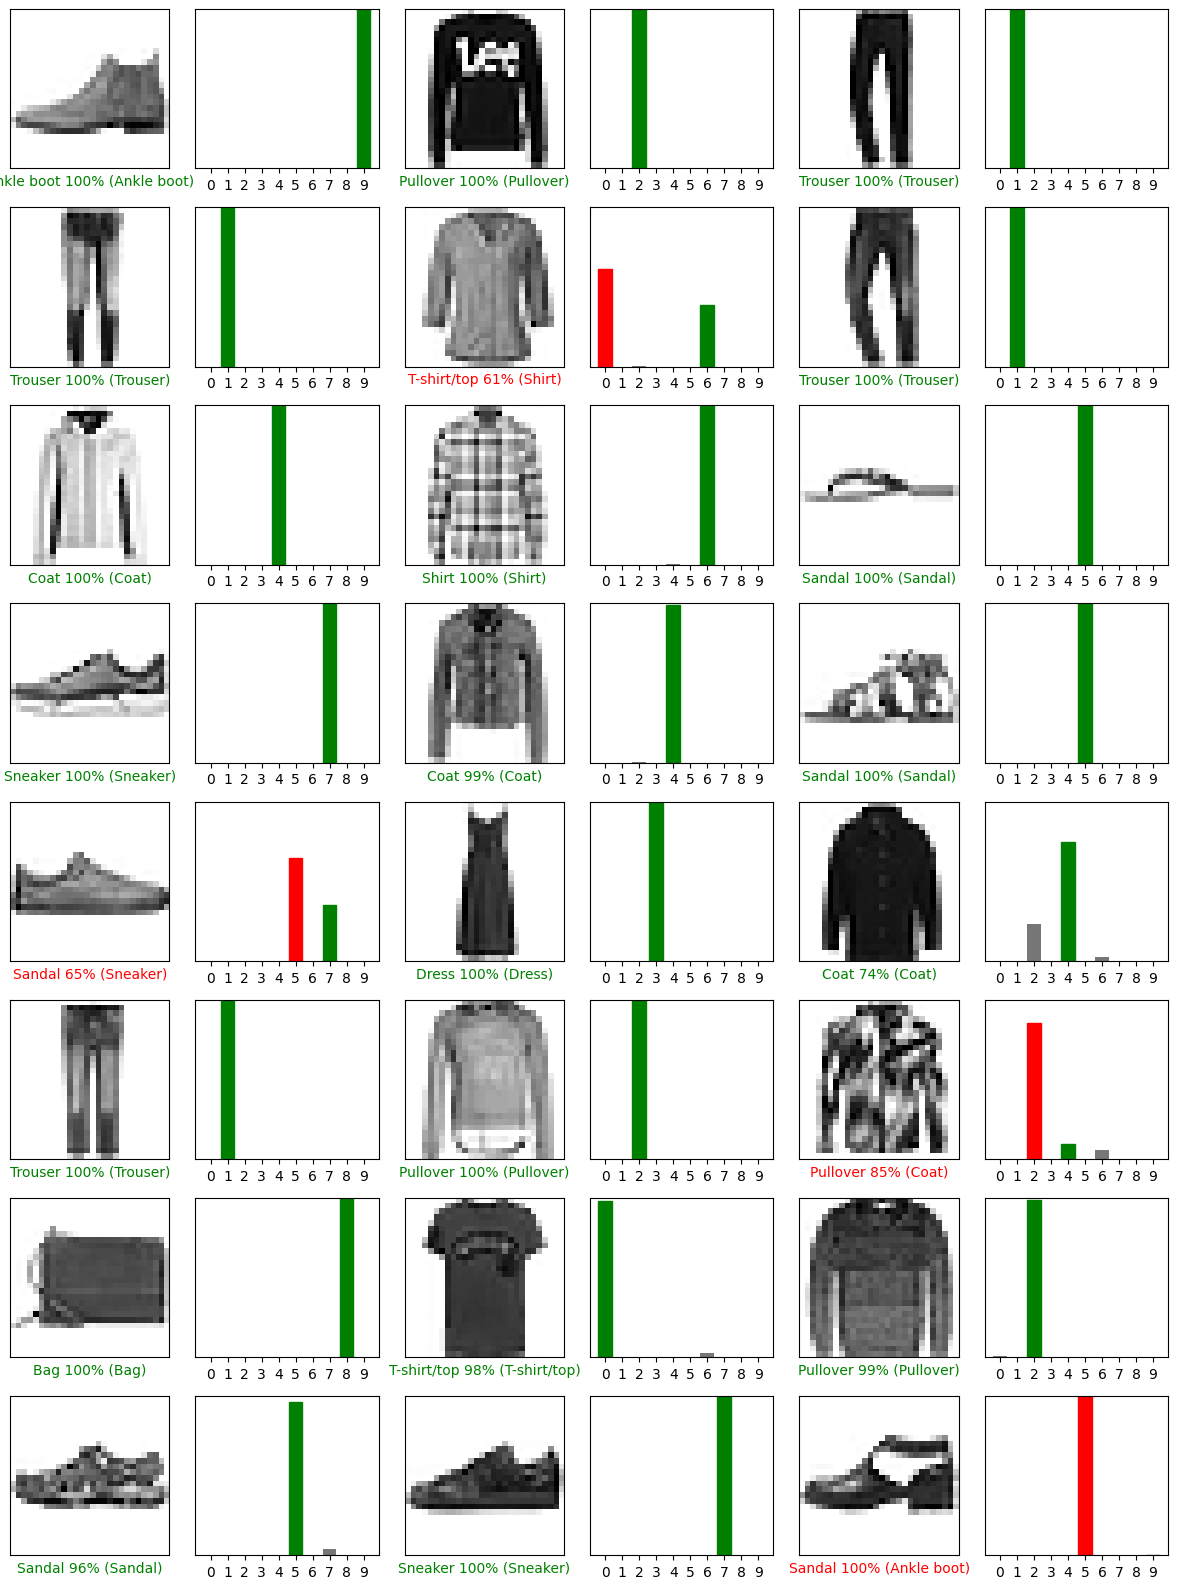

In [ ]:
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Our training model 

In [ ]:
img = test_img[5]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 15ms/step
[[2.3316382e-11 1.0000000e+00 1.6735115e-13 3.1841644e-11 1.0589898e-12
  3.1508387e-19 4.8789846e-13 2.4202202e-21 7.4633223e-18 5.3148485e-17]]


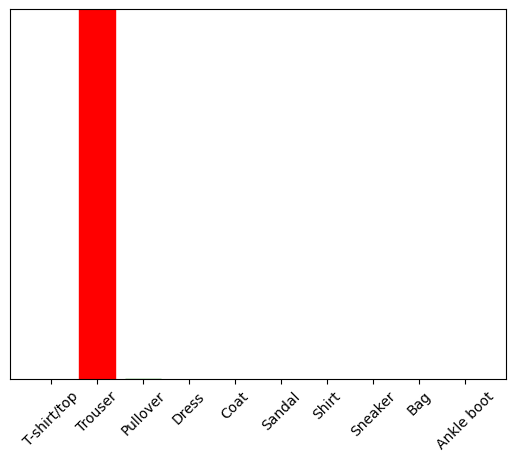

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), classnames, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])


1

And the model predicts a label as expected.

